# Diabetes Prediction, using 6 Different ML Algorithms

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)
%matplotlib inline 

## Loading and Reviewing the Data

In [4]:
data_frame = pd.read_csv("diabetes.csv")

In [5]:
data_frame.shape

(768, 9)

In [6]:
data_frame.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data_frame.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Definition of Features

From Data Source (Kaggle Dataset), we have the following definition of the features.

| Feature    |     Description | 
|--------------|-------------|
| 	Pregnancies     | Number of Pregnancies         |
| Glucose | Plasma glucose concentration a 2 hours in an oral glucose tolerance test         |
| BloodPressure | Diastolic blood pressure (mm Hg) |
| SkinThickness | Triceps skin fold thickness (mm) |
|Insulin | 2-Hour serum insulin (mu U/ml) |
| BMI |  Body mass index (weight in kg / (height in m)^2) |
| DiabetesPedigreeFunction       |  Diabetes pedigree function |
| Age | Age (years)|
| Outcome | Class variable (1 = True, 0 = False) |



## Here, only "Outcome" is the dependent variable.

## Every other variable is independent variable.


## Checking  for null values

In [8]:
print (data_frame.isnull().values.any())

False


In [9]:
data_frame.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## We can see that there are no correlated variables. 
## Every variable, except "Outcome" is independent.

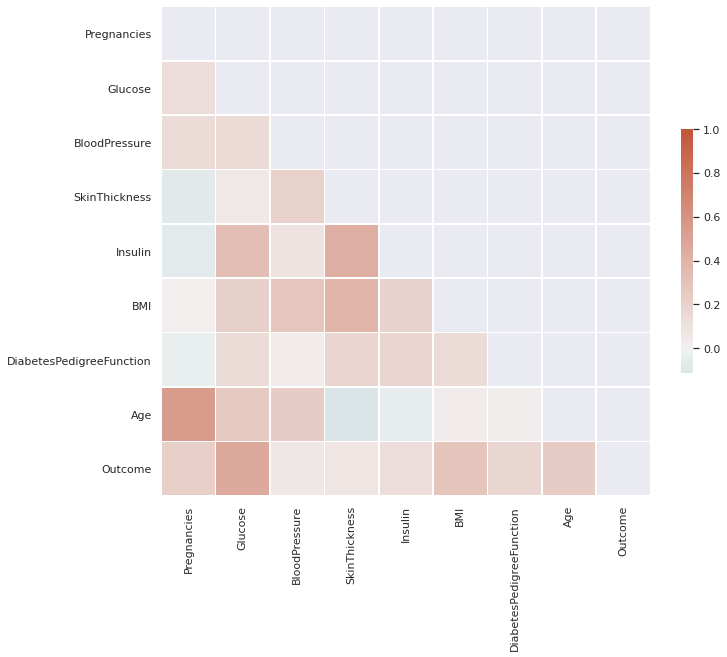

In [10]:
corr = data_frame.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(210, 20, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, linewidths = .5, cbar_kws = {"shrink": .5})

The correlations look good.  There appear to be no coorelated columns.

### Data Types

Inspect data types to see if there are any issues.  

The data and its data type(s) look good enough.

In [11]:
data_frame.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Check for Null Values

In [12]:
data_frame.isnull().values.any()

False

### Check Class distribution 

Rare events are hard to predict

In [13]:
num_obs = len(data_frame)
num_true = len(data_frame.loc[data_frame['Outcome'] == 1])
num_false = len(data_frame.loc[data_frame['Outcome'] == 0])
print("Number of True Cases:  {0} ({1:2.2f} %)".format(num_true, ((1.0 * num_true) / (1.0 * num_obs)) * 100))
print("Number of False Cases: {0} ({1:2.2f} %)".format(num_false, (( 1.0 * num_false) / (1.0 * num_obs)) * 100))

Number of True Cases:  268 (34.90 %)
Number of False Cases: 500 (65.10 %)


Good distribution of true and false cases.  No special work needed.

### Spliting the data 

70% for training, 30% for testing

In [14]:
from sklearn.model_selection import train_test_split

feature_col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class_names = ['Outcome']

X = data_frame[feature_col_names].values     # predictor feature columns (8 X m)
y = data_frame[predicted_class_names].values # predicted class (1 = true, 0 = false) column (1 X m)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 

We check to ensure we have the the desired 70% train, 30% test split of the data

In [15]:
trainval = (1.0 * len(X_train)) / (1.0 * len(data_frame.index))
testval = (1.0 * len(X_test)) / (1.0 * len(data_frame.index))
print("{0:0.2f} % in training set.". format(trainval * 100))
print("{0:0.2f} % in test set.". format(testval * 100))

69.92 % in training set.
30.08 % in test set.


#### Verifying "Outcome" Variable was split finely.

In [16]:
print("Original True  : {0} ({1:0.2f} %)".format(len(data_frame.loc[data_frame['Outcome'] == 1]), (len(data_frame.loc[data_frame['Outcome'] == 1]) / len(data_frame.index)) * 100.0))
print("Original False : {0} ({1:0.2f} %)".format(len(data_frame.loc[data_frame['Outcome'] == 0]), (len(data_frame.loc[data_frame['Outcome'] == 0]) / len(data_frame.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f} %)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1]) / len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f} %)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0]) / len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f} %)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f} %)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test) * 100.0)))


Original True  : 268 (34.90 %)
Original False : 500 (65.10 %)

Training True  : 188 (35.01 %)
Training False : 349 (64.99 %)

Test True      : 80 (34.63 %)
Test False     : 151 (65.37 %)


### Post-split Data Preparation

In [17]:
data_frame.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Hidden Missing Values

Are these 0 values possible? NO!

How many rows have have unexpected 0 values?

In [18]:
print("--> Rows in Data: {0}".format(len(data_frame)))
print("--> Rows Missing (Glucose): {0}".format(len(data_frame.loc[data_frame['Glucose'] == 0])))
print("--> Rows Missing (BloodPressure): {0}".format(len(data_frame.loc[data_frame['BloodPressure'] == 0])))
print("--> Rows Missing (SkinThickness): {0}".format(len(data_frame.loc[data_frame['SkinThickness'] == 0])))
print("--> Rows Missing (Insulin): {0}".format(len(data_frame.loc[data_frame['Insulin'] == 0])))
print("--> Rows Missing (BMI): {0}".format(len(data_frame.loc[data_frame['BMI'] == 0])))
print("--> Rows Missing (DiabetesPedigreeFunction): {0}".format(len(data_frame.loc[data_frame['DiabetesPedigreeFunction'] == 0])))
print("--> Rows Missing (Age): {0}".format(len(data_frame.loc[data_frame['Age'] == 0])))

--> Rows in Data: 768
--> Rows Missing (Glucose): 5
--> Rows Missing (BloodPressure): 35
--> Rows Missing (SkinThickness): 227
--> Rows Missing (Insulin): 374
--> Rows Missing (BMI): 11
--> Rows Missing (DiabetesPedigreeFunction): 0
--> Rows Missing (Age): 0


### Impute 0 values, with the mean

In [19]:
from sklearn.impute import SimpleImputer

# Impute with mean, all the 0 readings
fill_0 = SimpleImputer(missing_values = 0, strategy = "mean")

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

## "Naive Bayes" Algorithm

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB(priors = [0.865, 0.135], var_smoothing = 1e-10)

nb_model.fit(X_train, y_train.ravel())

nb_predict_train = nb_model.predict(X_train)
nb_accuracy = metrics.accuracy_score(y_train, nb_predict_train)
print ("- Accuracy of 'Gaussian NB', for Diabetes Prediction (On Training Data) is : {0:.5f}".format(nb_accuracy))
nb_predict_test = nb_model.predict(X_test)
nb_accuracy_testdata = metrics.accuracy_score(y_test, nb_predict_test)
print ("- Accuracy of 'Gaussian NB', for Diabetes Prediction (On Testing Data) is : {0:.5f}".format(nb_accuracy_testdata))

print ("\n\n")
print ("Confusion Matrix: \n")
print (metrics.confusion_matrix(y_test, nb_predict_test, labels = [1, 0])) 
print ("\n\n")
print ("Classification Report: \n")
print (metrics.classification_report(y_test, nb_predict_test, labels = [1, 0]))

- Accuracy of 'Gaussian NB', for Diabetes Prediction (On Training Data) is : 0.76164
- Accuracy of 'Gaussian NB', for Diabetes Prediction (On Testing Data) is : 0.75758



Confusion Matrix: 

[[ 41  39]
 [ 17 134]]



Classification Report: 

              precision    recall  f1-score   support

           1       0.71      0.51      0.59        80
           0       0.77      0.89      0.83       151

    accuracy                           0.76       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231



## "Random Forest Classifier" Algorithm

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
max_depth = [10, 20]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# Create the random grid
rf_random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_model = RandomForestClassifier()
rf_cv = RepeatedStratifiedKFold(n_splits = 7, n_repeats = 3, random_state = 1)
rf_grid_search = RandomizedSearchCV(estimator = rf_model, param_distributions = rf_random_grid, n_iter = 10, verbose = 2, random_state = 42, n_jobs = -1, cv = rf_cv, scoring = 'accuracy', error_score = 0)
rf_grid_result = rf_grid_search.fit(X_train, y_train.ravel())
print("Best: %f using %s" % (rf_grid_result.best_score_, rf_grid_result.best_params_))

rf_predict_train = rf_grid_result.predict(X_train)
rf_accuracy = metrics.accuracy_score(y_train, rf_predict_train)
print ("- Accuracy of 'Random Forest Classifier', for Diabetes Prediction (On Training Data) is : {0:.5f}".format(rf_accuracy))
rf_predict_test = rf_grid_result.predict(X_test)
rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)
print ("- Accuracy of 'Random Forest Classifier', for Diabetes Prediction (On Testing Data) is : {0:.5f}".format(rf_accuracy_testdata))

print ("\n\n")
print ("Confusion Matrix: \n")
print (metrics.confusion_matrix(y_test, rf_predict_test, labels = [1, 0])) 
print ("\n\n")
print ("Classification Report: \n")
print (metrics.classification_report(y_test, rf_predict_test, labels = [1, 0]))

Fitting 21 folds for each of 10 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:  1.1min finished


Best: 0.763557 using {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}
- Accuracy of 'Random Forest Classifier', for Diabetes Prediction (On Training Data) is : 1.00000
- Accuracy of 'Random Forest Classifier', for Diabetes Prediction (On Testing Data) is : 0.75758



Confusion Matrix: 

[[ 55  25]
 [ 31 120]]



Classification Report: 

              precision    recall  f1-score   support

           1       0.64      0.69      0.66        80
           0       0.83      0.79      0.81       151

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



## "Logistic Regression" Algorithm

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

lr_model = LogisticRegression()
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
lr_grid = dict(solver = solvers, penalty = penalty, C = c_values)
lr_cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
lr_grid_search = RandomizedSearchCV(estimator = lr_model, param_distributions = lr_grid, n_iter = 10, verbose = 2, random_state = 42, n_jobs = -1, cv = lr_cv, scoring = 'accuracy', error_score = 0)
lr_grid_result = lr_grid_search.fit(X_train, y_train.ravel())
# summarize results
print("Best: %f using %s" % (lr_grid_result.best_score_, lr_grid_result.best_params_))

lr_predict_train = lr_grid_result.predict(X_train)
lr_accuracy = metrics.accuracy_score(y_train, lr_predict_train)
print ("- Accuracy of 'Logistic Regression Classifier', for Diabetes Prediction (On Training Data) is : {0:.5f}".format(lr_accuracy))
lr_predict_test = lr_grid_result.predict(X_test)
lr_accuracy_testdata = metrics.accuracy_score(y_test, lr_predict_test)
print ("- Accuracy of 'Logistic Regression Classifier', for Diabetes Prediction (On Testing Data) is : {0:.5f}".format(lr_accuracy_testdata))

print ("\n\n")
print ("Confusion Matrix: \n")
print (metrics.confusion_matrix(y_test, lr_predict_test, labels = [1, 0])) 
print ("\n\n")
print ("Classification Report: \n")
print (metrics.classification_report(y_test, lr_predict_test, labels = [1, 0]))

Fitting 30 folds for each of 10 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    3.0s


Best: 0.775507 using {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.01}
- Accuracy of 'Logistic Regression Classifier', for Diabetes Prediction (On Training Data) is : 0.79143
- Accuracy of 'Logistic Regression Classifier', for Diabetes Prediction (On Testing Data) is : 0.73160



Confusion Matrix: 

[[ 47  33]
 [ 29 122]]



Classification Report: 

              precision    recall  f1-score   support

           1       0.62      0.59      0.60        80
           0       0.79      0.81      0.80       151

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    6.8s finished


## "Support Vector Machine" Algorithm

In [32]:
from sklearn.svm import SVC

svm_model = SVC()
kernel = ['poly', 'tanh', 'sigmoid']
C = [100, 50, 10, 1, 0.1, 0.01]
gamma = ['scale']
svm_grid = dict(kernel = kernel, C = C, gamma = gamma)
svm_cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
svm_grid_search = RandomizedSearchCV(estimator = svm_model, param_distributions = svm_grid, n_iter = 18, verbose = 2, random_state = 42, n_jobs = -1, cv = svm_cv, scoring = 'accuracy', error_score = 0)
svm_grid_result = svm_grid_search.fit(X_train, y_train.ravel())
# summarize results
print("Best: %f using %s" % (svm_grid_result.best_score_, svm_grid_result.best_params_))

svm_predict_train = svm_grid_result.predict(X_train)
svm_accuracy = metrics.accuracy_score(y_train, svm_predict_train)
print ("- Accuracy of 'Support Vector Machine', for Diabetes Prediction (On Training Data) is : {0:.5f}".format(svm_accuracy))
svm_predict_test = svm_grid_result.predict(X_test)
svm_accuracy_testdata = metrics.accuracy_score(y_test, svm_predict_test)
print ("- Accuracy of 'Support Vector Machine', for Diabetes Prediction (On Testing Data) is : {0:.5f}".format(svm_accuracy_testdata))

print ("\n\n")
print ("Confusion Matrix: \n")
print (metrics.confusion_matrix(y_test, svm_predict_test, labels = [1, 0])) 
print ("\n\n")
print ("Classification Report: \n")
print (metrics.classification_report(y_test, svm_predict_test, labels = [1, 0]))

Fitting 30 folds for each of 18 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    7.7s


Best: 0.774889 using {'kernel': 'poly', 'gamma': 'scale', 'C': 50}
- Accuracy of 'Support Vector Machine', for Diabetes Prediction (On Training Data) is : 0.79888
- Accuracy of 'Support Vector Machine', for Diabetes Prediction (On Testing Data) is : 0.74892



Confusion Matrix: 

[[ 46  34]
 [ 24 127]]



Classification Report: 

              precision    recall  f1-score   support

           1       0.66      0.57      0.61        80
           0       0.79      0.84      0.81       151

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.75      0.74       231



[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   15.2s finished


## "ANN"

In [39]:
from sklearn.neural_network import MLPClassifier

ann_model = MLPClassifier()
hidden_layer_sizes = [(13, 13, 13, 13, 13)]
max_iters = [500]
alpha = [0.00001]
learning_rate = ['constant', 'adaptive']
ann_grid = dict(alpha = alpha, learning_rate = learning_rate, max_iter = max_iters, hidden_layer_sizes = hidden_layer_sizes)
ann_cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
ann_grid_search = RandomizedSearchCV(estimator = ann_model, param_distributions = ann_grid, n_iter = 2, verbose = 2, random_state = 42, n_jobs = -1, cv = ann_cv, scoring = 'accuracy', error_score = 0)
ann_grid_result = ann_grid_search.fit(X_train, y_train.ravel())
# summarize results
print("Best: %f using %s" % (ann_grid_result.best_score_, ann_grid_result.best_params_))

ann_predict_train = ann_grid_result.predict(X_train)
ann_accuracy = metrics.accuracy_score(y_train, ann_predict_train)
print ("- Accuracy of 'ANN', for Diabetes Prediction (On Training Data) is : {0:.5f}".format(ann_accuracy))
ann_predict_test = ann_grid_result.predict(X_test)
ann_accuracy_testdata = metrics.accuracy_score(y_test, ann_predict_test)
print ("- Accuracy of 'ANN', for Diabetes Prediction (On Testing Data) is : {0:.5f}".format(ann_accuracy_testdata))

print ("\n\n")
print ("Confusion Matrix: \n")
print (metrics.confusion_matrix(y_test, ann_predict_test, labels = [1, 0])) 
print ("\n\n")
print ("Classification Report: \n")
print (metrics.classification_report(y_test, ann_predict_test, labels = [1, 0]))

Fitting 30 folds for each of 2 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   48.9s finished


Best: 0.733217 using {'max_iter': 500, 'learning_rate': 'constant', 'hidden_layer_sizes': (13, 13, 13, 13, 13), 'alpha': 1e-05}
- Accuracy of 'ANN', for Diabetes Prediction (On Training Data) is : 0.73743
- Accuracy of 'ANN', for Diabetes Prediction (On Testing Data) is : 0.72727



Confusion Matrix: 

[[ 43  37]
 [ 26 125]]



Classification Report: 

              precision    recall  f1-score   support

           1       0.62      0.54      0.58        80
           0       0.77      0.83      0.80       151

    accuracy                           0.73       231
   macro avg       0.70      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231



## "Decision Tree Classifier" Algorithm

In [36]:
from sklearn.tree import DecisionTreeClassifier

max_features = ['auto', 'sqrt', 'log2', None]
max_depth = [10, 20, 40, 60]
max_depth.append(None)
min_samples_split = [1, 2, 5, 7, 10, None]
min_samples_leaf = [1, 2, 4, 6, None]
# Create the random grid
dt_random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

dt_model = DecisionTreeClassifier()
dt_cv = RepeatedStratifiedKFold(n_splits = 25, n_repeats = 10, random_state = 1)
dt_grid_search = RandomizedSearchCV(estimator = dt_model, param_distributions = dt_random_grid, verbose = 2, random_state = 42, n_jobs = -1, cv = dt_cv, scoring = 'accuracy', error_score = 0)
dt_grid_result = dt_grid_search.fit(X_train, y_train.ravel())
print("Best: %f using %s" % (dt_grid_result.best_score_, dt_grid_result.best_params_))

dt_predict_train = dt_grid_result.predict(X_train)
dt_accuracy = metrics.accuracy_score(y_train, dt_predict_train)
print ("- Accuracy of 'Decision Tree Classifier', for Diabetes Prediction (On Training Data) is : {0:.5f}".format(dt_accuracy))
dt_predict_test = dt_grid_result.predict(X_test)
dt_accuracy_testdata = metrics.accuracy_score(y_test, dt_predict_test)
print ("- Accuracy of 'Decision Tree Classifier', for Diabetes Prediction (On Testing Data) is : {0:.5f}".format(dt_accuracy_testdata))

print ("\n\n")
print ("Confusion Matrix: \n")
print (metrics.confusion_matrix(y_test, dt_predict_test, labels = [1, 0])) 
print ("\n\n")
print ("Classification Report: \n")
print (metrics.classification_report(y_test, dt_predict_test, labels = [1, 0]))

Fitting 250 folds for each of 10 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 454 tasks      | elapsed:    1.9s


Best: 0.739359 using {'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': None, 'max_depth': 10}
- Accuracy of 'Decision Tree Classifier', for Diabetes Prediction (On Training Data) is : 0.88082
- Accuracy of 'Decision Tree Classifier', for Diabetes Prediction (On Testing Data) is : 0.74026



Confusion Matrix: 

[[ 53  27]
 [ 33 118]]



Classification Report: 

              precision    recall  f1-score   support

           1       0.62      0.66      0.64        80
           0       0.81      0.78      0.80       151

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.74      0.74       231



[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    5.6s finished


## Comparison of all the 6 ML Algorithms

Text(0.5, 0, 'False Positive Rate')

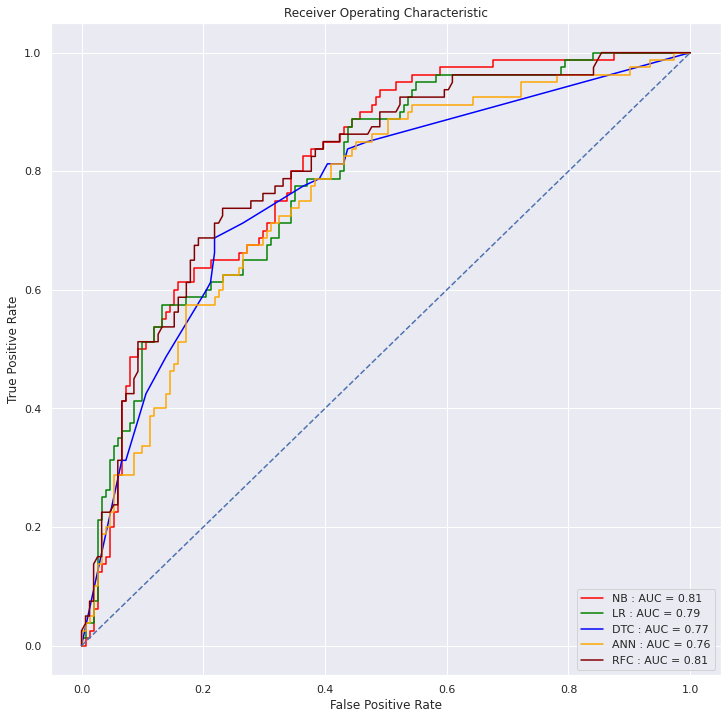

In [44]:
from sklearn.metrics import roc_curve, auc
y_prob = nb_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
nb_model.score(X_test, y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(12, 12))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'NB : AUC = %0.2f' % roc_auc)

y_prob = lr_grid_search.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
lr_grid_search.score(X_test, y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate,true_positive_rate, color='green',label = 'LR : AUC = %0.2f' % roc_auc)

y_prob = dt_grid_search.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
dt_grid_search.score(X_test, y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate,true_positive_rate, color='blue' ,label = 'DTC : AUC = %0.2f' % roc_auc)

y_prob = ann_grid_search.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
ann_grid_search.score(X_test, y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate,true_positive_rate, color='orange' ,label = 'ANN : AUC = %0.2f' % roc_auc)

y_prob = rf_grid_search.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
rf_grid_search.score(X_test, y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate,true_positive_rate, color='maroon' ,label = 'RFC : AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
level1 = RandomForestClassifier()
level0 = list()
level0.append(('nb', nb_model))
level0.append(('rfc', rf_grid_search))
level0.append(('dt', dt_grid_search))
level0.append(('lr', lr_grid_search))
level0.append(('svm', svm_grid_search))
level0.append(('ann', ann_grid_search))
print(level0)
model = StackingClassifier(estimators = level0, final_estimator = level1, cv = 4)
model.fit(X_train, y_train.ravel())

[('nb', GaussianNB(priors=[0.865, 0.135], var_smoothing=1e-10)), ('dt', RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=25, random_state=1),
                   error_score=0,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=...
  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 454 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 30 folds for each of 10 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 30 folds for each of 18 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   15.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 30 folds for each of 2 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   52.8s finished


Fitting 250 folds for each of 10 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1084 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 2497 out of 2500 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 250 folds for each of 10 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Done 1660 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 250 folds for each of 10 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Done 1660 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 250 folds for each of 10 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Done 1660 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 30 folds for each of 10 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 30 folds for each of 10 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 30 folds for each of 10 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 30 folds for each of 10 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 30 folds for each of 18 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 30 folds for each of 18 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 30 folds for each of 18 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 30 folds for each of 18 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 30 folds for each of 2 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   44.5s finished


Fitting 30 folds for each of 2 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   48.1s finished


Fitting 30 folds for each of 2 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   47.3s finished


Fitting 30 folds for each of 2 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   47.6s finished


StackingClassifier(cv=4,
                   estimators=[('nb',
                                GaussianNB(priors=[0.865, 0.135],
                                           var_smoothing=1e-10)),
                               ('dt',
                                RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=25, random_state=1),
                                                   error_score=0,
                                                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                    class_weight=None,
                                                                                    criterion='gini',
                                                                                    max_depth=None,
                                                                                    max_features=None,
                                                                        

In [ ]:
model_train = model.predict(X_train)
model_accuracy = metrics.accuracy_score(y_train, model_train)
print ("- Accuracy of 'Our Model', for Diabetes Prediction (On Training Data) is : {0:.5f}".format(model_accuracy))
model_predict_test = model.predict(X_test)
model_accuracy_testdata = metrics.accuracy_score(y_test, model_predict_test)
print ("- Accuracy of 'Our Model', for Diabetes Prediction (On Testing Data) is : {0:.5f}".format(model_accuracy_testdata))

print ("\n\n")
print ("Confusion Matrix: \n")
print (metrics.confusion_matrix(y_test, model_predict_test, labels = [1, 0])) 
print ("\n\n")
print ("Classification Report: \n")
print (metrics.classification_report(y_test, model_predict_test, labels = [1, 0]))

- Accuracy of 'Our Model', for Diabetes Prediction (On Training Data) is : 0.87896
- Accuracy of 'Our Model', for Diabetes Prediction (On Testing Data) is : 0.74459



Confusion Matrix: 

[[ 46  34]
 [ 25 126]]



Classification Report: 

              precision    recall  f1-score   support

           1       0.65      0.57      0.61        80
           0       0.79      0.83      0.81       151

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231

